In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
pip install mplcursors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mplcursors: filename=mplcursors-0.5.2-py3-none-any.whl size=21048 sha256=c3fedcc97c8a803bf667adc49fcb61ce4a5a6759e91f2a5fc1cb5da3a42bda96
  Stored in directory: /root/.cache/pip/wheels/b5/5b/fb/aed35cc15262c380536820fa3cb2e2d41fb52450de918a6785
Successfully built mplcursors


/usr/local/lib/python3.10/dist-packages/mplcursors/_pick_info.py:55: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  paths = scatter.__wrapped__(*args, **kwargs)


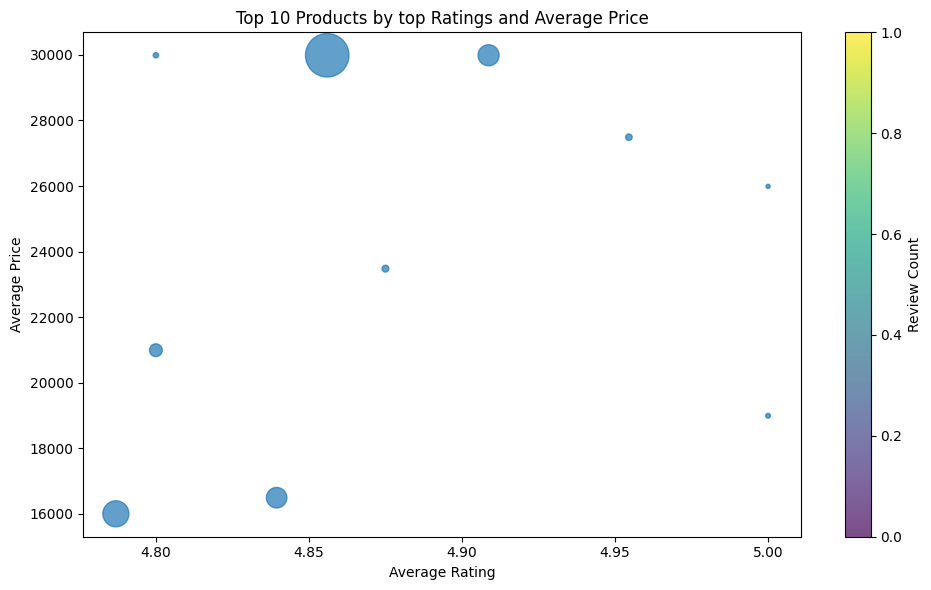

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import mplcursors  # Import the mplcursors library

# Read the CSV file
df = pd.read_csv('/content/drive/MyDrive/flipkart_processed_output.csv')

# Convert 'Price' column to numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Filter for ratings 4 and 5
high_rated_df = df[df['Rate'].isin([4, 5])]

# Filter for price range between 15000 and 40000
price_range_df = high_rated_df[(high_rated_df['Price'] >= 15000) & (high_rated_df['Price'] <= 40000)]

# Group by product and calculate average price, rating, and count of reviews
grouped_df = price_range_df.groupby('ProductName').agg({'Price': 'mean', 'Rate': ['mean', 'count']}).reset_index()
grouped_df.columns = ['ProductName', 'AvgPrice', 'AvgRating', 'ReviewCount']

# Sort by rating and get the top 10 products
top_products = grouped_df.sort_values(by='AvgRating', ascending=False).head(10)

# Create the bubble chart using matplotlib
plt.figure(figsize=(10, 6))

scatter = plt.scatter(
    top_products['AvgRating'],
    top_products['AvgPrice'],
    s=top_products['ReviewCount'],
    alpha=0.7,
    cmap='viridis'
)

plt.xlabel('Average Rating')
plt.ylabel('Average Price')
plt.title('Top 10 Products by top Ratings and Average Price')

# Adding a color bar to show the size scale
color_bar = plt.colorbar(scatter)
color_bar.set_label('Review Count')

# Adding hover functionality using mplcursors
cursor = mplcursors.cursor(hover=True)
@cursor.connect("add")
def on_add(sel):
    index = sel.target.index
    product_name = top_products.iloc[index]['ProductName']
    avg_price = top_products.iloc[index]['AvgPrice']
    avg_rating = top_products.iloc[index]['AvgRating']
    review_count = top_products.iloc[index]['ReviewCount']
    sel.annotation.set_text(f"Product: {product_name}\nAvg Price: {avg_price:.2f}\nAvg Rating: {avg_rating:.2f}\nReview Count: {review_count}")

plt.tight_layout()
plt.show()